# Introduction to Non-Personalized Recommenders

## About the authors

This IPython Notebook was forked from https://github.com/python-recsys/recsys-tutorial and modified by MSc Benjamin Tovar Cisneros (https://www.linkedin.com/in/benjamintovarcis/) on November 2015.

My forked version is available at https://github.com/TATABOX42/recsys-tutorial 

## The recommendation problem

Recommenders have been around since at least 1992. Today we see different flavours of recommenders, deployed across different verticals: 

- Amazon
- Netflix
- Facebook
- Last.fm.

What exactly do they do?

### Definitions from the literature

*In a typical recommender system people provide recommendations as inputs, which
the system then aggregates and directs to appropriate recipients.* -- Resnick
and Varian, 1997

*Collaborative filtering simply means that people collaborate to help one
another perform filtering by recording their reactions to documents they read.*
-- Goldberg et al, 1992

*In its most common formulation, the recommendation problem is reduced to the
problem of estimating ratings for the items that have not been seen by a
user. Intuitively, this estimation is usually based on the ratings given by this
user to other items and on some other information [...] Once we can estimate
ratings for the yet unrated items, we can recommend to the user the item(s) with
the highest estimated rating(s).* -- Adomavicius and Tuzhilin, 2005

*Driven by computer algorithms, recommenders help consumers
by selecting products they will probably like and might buy
based on their browsing, searches, purchases, and preferences.* -- Konstan and Riedl, 2012

### Notation

- $U$ is the set of users in our domain. Its size is $|U|$.
- $I$ is the set of items in our domain. Its size is $|I|$.
- $I(u)$ is the set of items that user $u$ has rated.
- $-I(u)$ is the complement of $I(u)$ i.e., the set of items not yet seen by user $u$.
- $U(i)$ is the set of users that have rated item $i$.
- $-U(i)$ is the complement of $U(i)$.

### Goal of a recommendation system

$$ 
\newcommand{\argmax}{\mathop{\rm argmax}\nolimits}
\forall{u \in U},\; i^* = \argmax_{i \in -I(u)} [S(u,i)] 
$$

### Problem statement

The recommendation problem in its most basic form is quite simple to define:

```
|-------------------+-----+-----+-----+-----+-----|
| user_id, movie_id | m_1 | m_2 | m_3 | m_4 | m_5 |
|-------------------+-----+-----+-----+-----+-----|
| u_1               | ?   | ?   | 4   | ?   | 1   |
|-------------------+-----+-----+-----+-----+-----|
| u_2               | 3   | ?   | ?   | 2   | 2   |
|-------------------+-----+-----+-----+-----+-----|
| u_3               | 3   | ?   | ?   | ?   | ?   |
|-------------------+-----+-----+-----+-----+-----|
| u_4               | ?   | 1   | 2   | 1   | 1   |
|-------------------+-----+-----+-----+-----+-----|
| u_5               | ?   | ?   | ?   | ?   | ?   |
|-------------------+-----+-----+-----+-----+-----|
| u_6               | 2   | ?   | 2   | ?   | ?   |
|-------------------+-----+-----+-----+-----+-----|
| u_7               | ?   | ?   | ?   | ?   | ?   |
|-------------------+-----+-----+-----+-----+-----|
| u_8               | 3   | 1   | 5   | ?   | ?   |
|-------------------+-----+-----+-----+-----+-----|
| u_9               | ?   | ?   | ?   | ?   | 2   |
|-------------------+-----+-----+-----+-----+-----|
```

*Given a partially filled matrix of ratings ($|U|x|I|$), estimate the missing values.*


### Challenges

#### Availability of item metadata

Content-based techniques are limited by the amount of metadata that is available
to describe an item. There are domains in which feature extraction methods are
expensive or time consuming, e.g., processing multimedia data such as graphics,
audio/video streams. In the context of grocery items for example, it's often the
case that item information is only partial or completely missing. Examples
include:

- Ingredients
- Nutrition facts
- Brand
- Description
- County of origin

#### New user problem

A user has to have rated a sufficient number of items before a recommender
system can have a good idea of what their preferences are. In a content-based
system, the aggregation function needs ratings to aggregate.

#### New item problem

Collaborative filters rely on an item being rated by many users to compute
aggregates of those ratings. Think of this as the exact counterpart of the new
user problem for content-based systems.

#### Data sparsity

When looking at the more general versions of content-based and collaborative
systems, the success of the recommender system depends on the availability of a
critical mass of user/item iteractions. We get a first glance at the data
sparsity problem by quantifying the ratio of existing ratings vs $|U|x|I|$. A
highly sparse matrix of interactions makes it difficult to compute similarities
between users and items. As an example, for a user whose tastes are unusual
compared to the rest of the population, there will not be any other users who
are particularly similar, leading to poor recommendations.


### Flow chart: the big picture


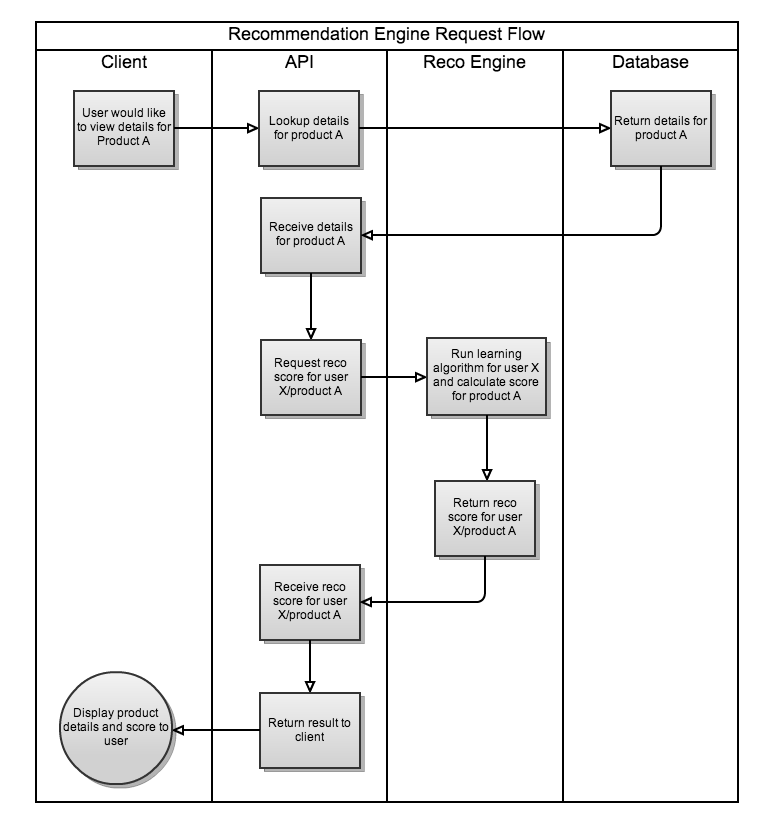

In [1]:
from IPython.core.display import Image 
Image(filename='./imgs/recsys_arch.png')

# The CourseTalk dataset: loading and first look

Loading of the CourseTalk database.

The CourseTalk data is spread across three files. Using the `pd.read_table`
method we load each file:


### Loading  the users dataset 

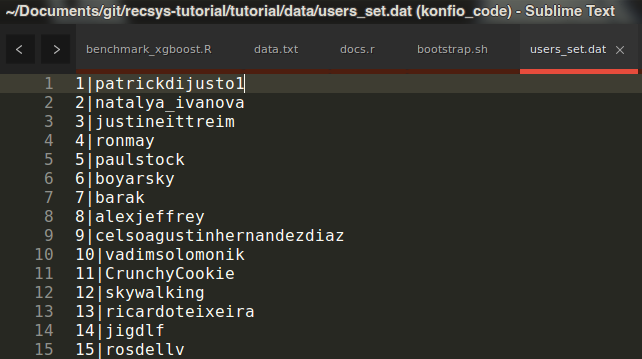

In [392]:
Image(filename='./imgs/example.png')

In [22]:
import pandas as pd

unames = ['user_id', 'username']
users = pd.read_table('./data/users_set.dat',
                      sep='|', header=None, names=unames)
# show output
users.head()

user_id         username
0        1  patrickdijusto1
1        2  natalya_ivanova
2        3   justineittreim
3        4           ronmay
4        5        paulstock

### Loading  the courses dataset 

In [19]:
mnames = ['course_id', 'title', 'avg_rating', 'workload', 'university', 'difficulty', 'provider']
courses = pd.read_table('./data/cursos.dat',
                       sep='|', header=None, names=mnames)
# show output
courses.head()

course_id                                              title avg_rating  \
0          1  An Introduction to Interactive Programming in ...        4.9   
1          2          Modern &amp; Contemporary American Poetry        4.9   
2          3      A Beginner&#39;s Guide to Irrational Behavior        4.9   
3          4           Design: Creation of Artifacts in Society        4.9   
4          5                          Greek and Roman Mythology        4.9   

          workload                  university   difficulty  provider  
0  7-10 hours/week             Rice University       Medium  coursera  
1   5-9 hours/week  University of Pennsylvania  Easy/medium  coursera  
2  7-10 hours/week             Duke University       Medium  coursera  
3  5-10 hours/week  University of Pennsylvania       Medium  coursera  
4  8-10 hours/week  University of Pennsylvania       Medium  coursera

### Loading  the ratings dataset 

In [18]:
rnames = ['user_id', 'course_id', 'rating']
ratings = pd.read_table('./data/ratings.dat',
                        sep='|', header=None, names=rnames)
# show output
ratings.head()

user_id  course_id  rating
0        1          1       5
1        2          1       5
2        3          1       5
3        4          1       5
4        5          1       5

## Using `pd.merge` we get it all into  one big DataFrame.

In [23]:
coursetalk = pd.merge(pd.merge(ratings, courses), users)
# show output
coursetalk.head()

user_id  course_id  rating  \
0        1          1       5   
1        2          1       5   
2        3          1       5   
3        4          1       5   
4        5          1       5   

                                               title avg_rating  \
0  An Introduction to Interactive Programming in ...        4.9   
1  An Introduction to Interactive Programming in ...        4.9   
2  An Introduction to Interactive Programming in ...        4.9   
3  An Introduction to Interactive Programming in ...        4.9   
4  An Introduction to Interactive Programming in ...        4.9   

          workload       university difficulty  provider         username  
0  7-10 hours/week  Rice University     Medium  coursera  patrickdijusto1  
1  7-10 hours/week  Rice University     Medium  coursera  natalya_ivanova  
2  7-10 hours/week  Rice University     Medium  coursera   justineittreim  
3  7-10 hours/week  Rice University     Medium  coursera           ronmay  
4  7-10 hours/week  Rice University     Medium  coursera        paulstock

## Extracting a subset of the original data frame

In [68]:
# set features
features = ["title","university","rating","avg_rating","difficulty"]
# Specific dataset
data2 = pd.DataFrame(coursetalk, columns = features)
# show output
data2.head()

title       university  rating  \
0  An Introduction to Interactive Programming in ...  Rice University       5   
1  An Introduction to Interactive Programming in ...  Rice University       5   
2  An Introduction to Interactive Programming in ...  Rice University       5   
3  An Introduction to Interactive Programming in ...  Rice University       5   
4  An Introduction to Interactive Programming in ...  Rice University       5   

  avg_rating difficulty  
0        4.9     Medium  
1        4.9     Medium  
2        4.9     Medium  
3        4.9     Medium  
4        4.9     Medium

### Using `groupby` function

In [85]:
bydifficulty = data2.groupby('difficulty')
bydifficulty.head(n=2)

title  \
0     An Introduction to Interactive Programming in ...   
1     An Introduction to Interactive Programming in ...   
6            Functional Programming Principles in Scala   
7                                          Gamification   
9                      6.002x: Circuits and Electronics   
10           Internet History, Technology, and Security   
11                                      Web Development   
17                                     Software Testing   
73                        2.01x: Elements of Structures   
813                      Probabilistic Graphical Models   
912                          Introduction to Psychology   
2118                        Introduction to Programming   
2340                                    College Algebra   
2341                                    College Algebra   
2488                         Introduction to Psychology   

                                    university  rating avg_rating   difficulty  
0                              Rice University     5.0        4.9       Medium  
1                              Rice University     5.0        4.9       Medium  
6     Ecole Polytechnique Federale de Lausanne     4.5        4.8  Medium/hard  
7                   University of Pennsylvania     4.0        4.8  Easy/medium  
9                                          MIT     5.0        4.7  Medium/hard  
10                      University of Michigan     5.0        4.6         Easy  
11                                         NaN     4.0        4.6  Easy/medium  
17                                         NaN     2.0        2.9         Easy  
73                                         MIT     4.5        4.3         Hard  
813                        Stanford University     5.0        4.2         Hard  
912                                        NaN     4.0        4.2      PSYC001  
2118                                       NaN     4.0        3.6       CS046A  
2340                                       NaN     5.0        4.5     MATH 008  
2341                                       NaN     5.0        4.5     MATH 008  
2488                                       NaN     5.0        4.2      PSYC001

## Dropping rows with `NULL` values

In [88]:
bydifficulty = data2.dropna().groupby('difficulty')
bydifficulty.head(n=2)

title  \
0    An Introduction to Interactive Programming in ...   
1    An Introduction to Interactive Programming in ...   
6           Functional Programming Principles in Scala   
7                                         Gamification   
9                     6.002x: Circuits and Electronics   
10          Internet History, Technology, and Security   
13                          Human-Computer Interaction   
40   Astrobiology and the Search for Extraterrestri...   
73                       2.01x: Elements of Structures   
813                     Probabilistic Graphical Models   

                                   university  rating avg_rating   difficulty  
0                             Rice University     5.0        4.9       Medium  
1                             Rice University     5.0        4.9       Medium  
6    Ecole Polytechnique Federale de Lausanne     4.5        4.8  Medium/hard  
7                  University of Pennsylvania     4.0        4.8  Easy/medium  
9                                         MIT     5.0        4.7  Medium/hard  
10                     University of Michigan     5.0        4.6         Easy  
13                        Stanford University     5.0        4.1  Easy/medium  
40                    University of Edinburgh     5.0        4.0         Easy  
73                                        MIT     4.5        4.3         Hard  
813                       Stanford University     5.0        4.2         Hard

## Using `describe` function

In [89]:
bydifficulty['rating'].describe()

difficulty        
Easy         count      98.000000
             mean        3.903061
             std         1.348268
             min         0.500000
             25%         3.500000
             50%         4.500000
             75%         5.000000
             max         5.000000
Easy/medium  count     453.000000
             mean        4.406181
             std         1.013474
             min         0.500000
             25%         4.000000
             50%         5.000000
             75%         5.000000
             max         5.000000
Hard         count      43.000000
             mean        4.186047
             std         1.046669
             min         1.500000
             25%         4.000000
             50%         4.500000
             75%         5.000000
             max         5.000000
Medium       count    1657.000000
             mean        4.605311
             std         0.864411
             min         0.500000
             25%         4.50

### Run another similar example

In [90]:
byuniversity = data2.dropna().groupby('university')
byuniversity.head(n=2)

title  \
0     An Introduction to Interactive Programming in ...   
1     An Introduction to Interactive Programming in ...   
6            Functional Programming Principles in Scala   
7                                          Gamification   
9                      6.002x: Circuits and Electronics   
10           Internet History, Technology, and Security   
12                     CS-169.1x: Software as a Service   
13                           Human-Computer Interaction   
14                        Web Intelligence and Big Data   
15    Coding the Matrix: Linear Algebra through Comp...   
16                                          Game Theory   
22             An Introduction to Operations Management   
23                                       Model Thinking   
27                      Computational Investing, Part I   
33                                       ER22x: Justice   
34                                   The Ancient Greeks   
35                        Synapses, Neurons and Brains    
36                             Control of Mobile Robots   
37                                  Drugs and the Brain   
38              Bioelectricity: A Quantitative Approach   
39                                    Computer Networks   
40    Astrobiology and the Search for Extraterrestri...   
42                               Galaxies and Cosmology   
43                 Think Again: How to Reason and Argue   
44                Epigenetic Control of Gene Expression   
45    Developing Innovative Ideas for New Companies:...   
49               Mathematical Biostatistics Boot Camp 1   
54                   Learn to Program: The Fundamentals   
73                        2.01x: Elements of Structures   
75                            Passion Driven Statistics   
...                                                 ...   
99    Coding the Matrix: Linear Algebra through Comp...   
109         The Modern World: Global History since 1760   
111                          Introduction to Philosophy   
133             Learn to Program: Crafting Quality Code   
467                                         Songwriting   
671                                       Data Analysis   
718                           Introduction to Sociology   
722                      Introduction to Sustainability   
724          Science from Superheroes to Global Warming   
788         The Modern World: Global History since 1760   
794                           Microeconomics Principles   
1015                             Useful Genetics Part 1   
1019  Nutrition for Health Promotion and Disease Pre...   
1077                               Intermediate Algebra   
1088                      Synapses, Neurons and Brains    
1095           A Look at Nuclear Science and Technology   
1167                             Introduction to Guitar   
1388  Exercise Physiology: Understanding the Athlete...   
1450   Contraception: Choices, Culture and Consequences   
1451                          The Science of Gastronomy   
1467            CS50x: Introduction to Computer Science   
1781                    Introduction to Systems Biology   
1805               Introduction to Digital Sound Design   
2182  Science, Technology, and Society in China I: B...   
2260           A Look at Nuclear Science and Technology   
2281                        Natural Language Processing   
2413                             Useful Genetics Part 1   
2439                                               AIDS   
2580                        Natural Language Processing   
2752                    Introduction to Systems Biology   

                                             university  rating avg_rating  \
0                                       Rice University     5.0        4.9   
1                                       Rice University     5.0        4.9   
6              Ecole Polytechnique Federale de Lausanne     4.5        4.8   
7                            University of Pennsylvania     4.0        4.8   
9

In [91]:
byuniversity['rating'].describe()

university                               
Berklee College of Music            count    11.000000
                                    mean      3.909091
                                    std       1.044466
                                    min       2.500000
                                    25%       3.000000
                                    50%       4.000000
                                    75%       5.000000
                                    max       5.000000
Brown University                    count    24.000000
                                    mean      4.416667
                                    std       0.974308
                                    min       1.500000
                                    25%       4.000000
                                    50%       5.000000
                                    75%       5.000000
                                    max       5.000000
California Institute of Technology  count    16.000000
                       

## Running all together: drop `NULL` values and `groupby` University and course difficulty

In [93]:
byuniversity_and_difficulty = data2.dropna().groupby(['university',"difficulty"])
byuniversity_and_difficulty.head(n=2)

title  \
0     An Introduction to Interactive Programming in ...   
1     An Introduction to Interactive Programming in ...   
6            Functional Programming Principles in Scala   
7                                          Gamification   
9                      6.002x: Circuits and Electronics   
10           Internet History, Technology, and Security   
12                     CS-169.1x: Software as a Service   
13                           Human-Computer Interaction   
14                        Web Intelligence and Big Data   
15    Coding the Matrix: Linear Algebra through Comp...   
16                                          Game Theory   
22             An Introduction to Operations Management   
23                                       Model Thinking   
24    Fantasy and Science Fiction: The Human Mind, O...   
25                                       Networked Life   
26                              Social Network Analysis   
27                      Computational Investing, Part I   
31                                     Machine Learning   
33                                       ER22x: Justice   
34                                   The Ancient Greeks   
35                        Synapses, Neurons and Brains    
36                             Control of Mobile Robots   
37                                  Drugs and the Brain   
38              Bioelectricity: A Quantitative Approach   
39                                    Computer Networks   
40    Astrobiology and the Search for Extraterrestri...   
41                              Writing in the Sciences   
42                               Galaxies and Cosmology   
43                 Think Again: How to Reason and Argue   
44                Epigenetic Control of Gene Expression   
...                                                 ...   
2322                        Experimental Genome Science   
2329  Stat2.2x: Introduction to Statistics: Probability   
2332  Grow to Greatness: Smart Growth for Private Bu...   
2335             Fundamentals of Electrical Engineering   
2339             Fundamentals of Electrical Engineering   
2342                        Principles of Public Health   
2343                        Principles of Public Health   
2413                             Useful Genetics Part 1   
2435                               Medical Neuroscience   
2436                           Clinical Problem Solving   
2439                                               AIDS   
2466                                 Jazz Improvisation   
2490                         VLSI CAD:  Logic to Layout   
2580                        Natural Language Processing   
2584           14.73x: The Challenges of Global Poverty   
2586           14.73x: The Challenges of Global Poverty   
2598  Image and video processing: From Mars to Holly...   
2599                                   Animal Behaviour   
2646                          The Science of Gastronomy   
2667                    Health Informatics in the Cloud   
2684                                 Jazz Improvisation   
2720                              Disaster Preparedness   
2721                   Generating the Wealth of Nations   
2748                      CB22x: The Ancient Greek Hero   
2752                    Introduction to Systems Biology   
2763  Preparation for Introductory Biology: DNA to O...   
2764                              Computer Architecture   
2769  A New History for a New China, 1700-2000: New ...   
2770  A New History for a New China, 1700-2000: New ...   
2771                                 Sports and Society   

                                             university  rating avg_rating  \
0                                       Rice University     5.0        4.9   
1                                       Rice University     5.0        4.9   
6              Ecole Polytechnique Federale de Lausanne     4.5        4.8   
7                            University of Pennsylvania     4.0        4.8   
9

In [94]:
# using describe function
byuniversity_and_difficulty['rating'].describe()

university                difficulty        
Berklee College of Music  Medium       count     9.000000
                                       mean      3.944444
                                       std       1.157704
                                       min       2.500000
                                       25%       2.500000
                                       50%       4.000000
                                       75%       5.000000
                                       max       5.000000
                          Medium/hard  count     2.000000
                                       mean      3.750000
                                       std       0.353553
                                       min       3.500000
                                       25%       3.625000
                                       50%       3.750000
                                       75%       3.875000
                                       max       4.000000
Brown University          M

In [393]:
# or we can use another function, such as mean
byuniversity_and_difficulty["rating"].mean()

university                                difficulty 
Berklee College of Music                  Medium         3.944444
                                          Medium/hard    3.750000
Brown University                          Medium         4.928571
                                          Medium/hard    4.205882
California Institute of Technology        Medium/hard    4.093750
Columbia University                       Medium/hard    4.166667
Duke University                           Easy           0.666667
                                          Hard           4.750000
                                          Medium         4.721311
                                          Medium/hard    4.416667
Ecole Polytechnique Federale de Lausanne  Hard           5.000000
                                          Medium/hard    4.822581
Emory University                          Medium         5.000000
Georgia Institute of Technology           Easy/medium    3.083333
                      

In [394]:
# or we can just count the number of grouped events
byuniversity_and_difficulty["difficulty"].count()

university                                difficulty 
Berklee College of Music                  Medium           9
                                          Medium/hard      2
Brown University                          Medium           7
                                          Medium/hard     17
California Institute of Technology        Medium/hard     16
Columbia University                       Medium/hard      3
Duke University                           Easy             3
                                          Hard             2
                                          Medium         183
                                          Medium/hard     18
Ecole Polytechnique Federale de Lausanne  Hard             2
                                          Medium/hard     31
Emory University                          Medium           2
Georgia Institute of Technology           Easy/medium      6
                                          Hard             1
                               

### Allow ploting in notebook

In [ ]:
%pylab inline

### Plot the histogram of ratings

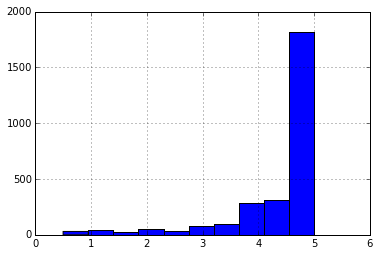

In [117]:
data2.rating.hist()

# Collaborative filtering: generalizations of the aggregation function

## Non-personalized recommendations


### Groupby

The idea of groupby is that of *split-apply-combine*:

- split data in an object according to a given key;
- apply a function to each subset;
- combine results into a new object.

 To get mean course ratings grouped by the provider, we can use the pivot_table method:

In [397]:
mean_ratings = coursetalk.pivot_table('rating','provider',aggfunc='mean')
mean_ratings = mean_ratings.sort_values(ascending=False)
pd.DataFrame(mean_ratings)

rating
provider              
None          4.562500
coursera      4.527835
edx           4.491620
codecademy    4.450000
udacity       4.241071
udemy         4.200000
open2study    4.083333
khanacademy   4.000000
novoed        3.281250
mruniversity  3.250000

Now let's filter down to courses that received at least 20 ratings (a completely arbitrary number);
To do this, I group the data by course_id and use size() to get a Series of group sizes for each title:

In [400]:
ratings_by_title = coursetalk.groupby('title').size()
pd.DataFrame(ratings_by_title,columns=["# of ratings"]).head(n=10)

# of ratings
title                                                           
14.73x: The Challenges of Global Poverty                       2
2.01x: Elements of Structures                                  2
3.091x: Introduction to Solid State Chemistry                  3
6.002x: Circuits and Electronics                              10
6.00x: Introduction to Computer Science and Pro...            21
7.00x: Introduction to Biology - The Secret of ...             3
8.02x: Electricity and Magnetism                               3
8.MReVx: Mechanics ReView                                      1
A Beginner&#39;s Guide to Irrational Behavior                147
A Crash Course on Creativity                                   5

In [401]:
# set rating threshold
rating_threshold = 20
active_titles = ratings_by_title.index[ratings_by_title >= rating_threshold]
pd.DataFrame(active_titles).head()

title
0  6.00x: Introduction to Computer Science and Pr...
1      A Beginner&#39;s Guide to Irrational Behavior
2  An Introduction to Interactive Programming in ...
3           An Introduction to Operations Management
4  CS-191x: Quantum Mechanics and Quantum Computa...

The index of titles receiving at least 20 ratings can then be used to select rows from mean_ratings above:


In [402]:
# compute mean ratings for selected courses only
mean_ratings = coursetalk.pivot_table('rating','title', aggfunc='mean')
pd.DataFrame(mean_ratings)

rating
title                                                       
14.73x: The Challenges of Global Poverty            4.250000
2.01x: Elements of Structures                       4.750000
3.091x: Introduction to Solid State Chemistry       4.166667
6.002x: Circuits and Electronics                    4.800000
6.00x: Introduction to Computer Science and Pro...  4.166667
7.00x: Introduction to Biology - The Secret of ...  4.666667
8.02x: Electricity and Magnetism                    4.333333
8.MReVx: Mechanics ReView                           5.000000
A Beginner&#39;s Guide to Irrational Behavior       4.874150
A Crash Course on Creativity                        3.500000
A History of the World since 1300                   4.318182
A Look at Nuclear Science and Technology            3.000000
A New History for a New China, 1700-2000: New D...  0.500000
AIDS                                                5.000000
Aboriginal Worldviews and Education                 4.333333
Algorithms                                          4.250000
Algorithms, Part I                                  4.555556
Algorithms, Part II                                 4.500000
Algorithms: Design and Analysis, Part 1             4.777778
Algorithms: Design and Analysis, Part 2             4.500000
An Introduction to Interactive Programming in P...  4.915652
An Introduction to Operations Management            4.785714
An Introduction to the U.S. Food System: Perspe...  5.000000
Animal Behaviour                                    4.500000
Applied Cryptography                                4.666667
Archaeology&#39;s Dirty Little Secrets              4.928571
Artificial Intelligence Planning                    3.250000
Artificial Intelligence for Robotics                4.333333
Astrobiology and the Search for Extraterrestria...  3.928571
Automata                                            4.000000
...                                                      ...
Sports and Society                                  0.666667
Stat2.1X: Introduction to Statistics: Descripti...  4.642857
Stat2.2x: Introduction to Statistics: Probability   5.000000
Stat2.3x: Introduction to Statistics: Inference     4.500000
Statistics One                                      3.909091
Synapses, Neurons and Brains                        4.600000
Teaching Adult Learners (WPTrain)                   2.500000
Technology Entrepreneurship Part 1                  2.900000
Technology Entrepreneurship Part 2                  0.500000
The Ancient Greeks                                  4.550000
The Eurozone Crisis                                 3.250000
The Fiction of Relationship                         5.000000
The Hardware/Software Interface                     3.857143
The Language of Hollywood: Storytelling, Sound,...  4.800000
The Massey Method: Learn Spanish from a Former ...  4.000000
The Modern World: Global History since 1760         4.775862
The Modern and the Postmodern                       4.777778
The Science of Gastronomy                           4.000000
The Social Context of Mental Health and Illness     4.333333
Think Again: How to Reason and Argue                3.815789
Useful Genetics Part 1                              4.500000
VLSI CAD:  Logic to Layout                          4.500000
Vaccine Trials: Methods and Best Practices          5.000000
Vaccines                                            3.750000
Web Development                                     4.625000
Web Intelligence and Big Data                       3.802326
Women and the Civil Rights Movement                 5.000000
Writing for the Web (WriteWeb)                      5.000000
Writing in the Sciences                             4.000000
jQuery                                              4.250000

[211 rows x 1 columns]

By computing the mean rating for each course, we will order with the highest rating listed first.


In [403]:
# rank by avg rating
pd.DataFrame(mean_ratings.ix[active_titles].sort_values(ascending=False))

rating
title                                                       
An Introduction to Interactive Programming in P...  4.915652
Modern &amp; Contemporary American Poetry           4.901515
Design: Creation of Artifacts in Society            4.879581
A Beginner&#39;s Guide to Irrational Behavior       4.874150
Greek and Roman Mythology                           4.864198
Calculus: Single Variable                           4.854167
CS188.1x Artificial Intelligence                    4.833333
Machine Learning                                    4.830000
Functional Programming Principles in Scala          4.822581
Gamification                                        4.796296
An Introduction to Operations Management            4.785714
The Modern World: Global History since 1760         4.775862
Programming Languages                               4.770833
CS-191x: Quantum Mechanics and Quantum Computation  4.727273
Cryptography I                                      4.700000
Discrete Optimization                               4.695652
Introduction to Computer Science                    4.687500
Learn to Program: Crafting Quality Code             4.585714
Model Thinking                                      4.578125
Internet History, Technology, and Security          4.541667
Fantasy and Science Fiction: The Human Mind, Ou...  4.522727
Learn to Program: The Fundamentals                  4.303571
6.00x: Introduction to Computer Science and Pro...  4.166667
Critical Thinking in Global Challenges              3.961538
Web Intelligence and Big Data                       3.802326
Computing for Data Analysis                         3.187500
Introduction to Finance                             3.086957
Introduction to Data Science                        3.060000

To see the top courses among Coursera students, we can sort by the 'Coursera' column in descending order:


In [404]:
mean_ratings = coursetalk.pivot_table('rating', # populate table with 
                                      'title', # set rows
                                      'provider',# set columns 
                                       aggfunc='mean' # define aggregator function (to be applied on 1st parameter)
                                     )
mean_ratings[0:10]

provider                                            None  codecademy  \
title                                                                  
14.73x: The Challenges of Global Poverty             NaN         NaN   
2.01x: Elements of Structures                        NaN         NaN   
3.091x: Introduction to Solid State Chemistry        NaN         NaN   
6.002x: Circuits and Electronics                     NaN         NaN   
6.00x: Introduction to Computer Science and Pro...   NaN         NaN   
7.00x: Introduction to Biology - The Secret of ...   NaN         NaN   
8.02x: Electricity and Magnetism                     NaN         NaN   
8.MReVx: Mechanics ReView                            NaN         NaN   
A Beginner&#39;s Guide to Irrational Behavior        NaN         NaN   
A Crash Course on Creativity                         NaN         NaN   

provider                                            coursera       edx  \
title                                                                    
14.73x: The Challenges of Global Poverty                 NaN  4.250000   
2.01x: Elements of Structures                            NaN  4.750000   
3.091x: Introduction to Solid State Chemistry            NaN  4.166667   
6.002x: Circuits and Electronics                         NaN  4.800000   
6.00x: Introduction to Computer Science and Pro...       NaN  4.166667   
7.00x: Introduction to Biology - The Secret of ...       NaN  4.666667   
8.02x: Electricity and Magnetism                         NaN  4.333333   
8.MReVx: Mechanics ReView                                NaN  5.000000   
A Beginner&#39;s Guide to Irrational Behavior        4.87415       NaN   
A Crash Course on Creativity                             NaN       NaN   

provider                                            khanacademy  mruniversity  \
title                                                                           
14.73x: The Challenges of Global Poverty                    NaN           NaN   
2.01x: Elements of Structures                               NaN           NaN   
3.091x: Introduction to Solid State Chemistry               NaN           NaN   
6.002x: Circuits and Electronics                            NaN           NaN   
6.00x: Introduction to Computer Science and Pro...          NaN           NaN   
7.00x: Introduction to Biology - The Secret of ...          NaN           NaN   
8.02x: Electricity and Magnetism                            NaN           NaN   
8.MReVx: Mechanics ReView                                   NaN           NaN   
A Beginner&#39;s Guide to Irrational Behavior               NaN           NaN   
A Crash Course on Creativity                                NaN           NaN   

provider                                            novoed  open2study  \
title                                                                    
14.73x: The Challenges of Global Poverty               NaN         NaN   
2.01x: Elements of Structures                          NaN         NaN   
3.091x: Introduction to Solid State Chemistry          NaN         NaN   
6.002x: Circuits and Electronics                       NaN         NaN   
6.00x: Introduction to Computer Science and Pro...     NaN         NaN   
7.00x: Introduction to Biology - The Secret of ...     NaN         NaN   
8.02x: Electricity and Magnetism                       NaN         NaN   
8.MReVx: Mechanics ReView                              NaN         NaN   
A Beginner&#39;s Guide to Irrational Behavior          NaN         NaN   
A Crash Course on Creativity                           3.5         NaN   

provider                                            udacity  udemy  
title                                                               
14.73x: The Challenges of Global Poverty                NaN    NaN  
2.01x: Elements of Structures                           NaN    NaN  
3.091x: Introduction to Solid State Chemistry           NaN    NaN  
6.002x: Circuits and Electronics       

In [405]:
# get mean rating of course 6.00x: Introduction to Computer Science and Programming offered by MIT's EDX
mean_ratings['edx']["6.00x: Introduction to Computer Science and Programming"]

4.166666666666667

In [406]:
# show a data frame of all coursera active titles (>= 20 ratings) ordered by average ratings
pd.DataFrame(mean_ratings['coursera'][active_titles].dropna().sort_values(ascending=False))

coursera
title                                                       
An Introduction to Interactive Programming in P...  4.915652
Modern &amp; Contemporary American Poetry           4.901515
Design: Creation of Artifacts in Society            4.879581
A Beginner&#39;s Guide to Irrational Behavior       4.874150
Greek and Roman Mythology                           4.864198
Calculus: Single Variable                           4.854167
Programming Languages                               4.850000
Machine Learning                                    4.830000
Functional Programming Principles in Scala          4.822581
Gamification                                        4.796296
An Introduction to Operations Management            4.785714
The Modern World: Global History since 1760         4.775862
Cryptography I                                      4.700000
Discrete Optimization                               4.695652
Learn to Program: Crafting Quality Code             4.585714
Model Thinking                                      4.578125
Internet History, Technology, and Security          4.541667
Fantasy and Science Fiction: The Human Mind, Ou...  4.522727
Learn to Program: The Fundamentals                  4.303571
Critical Thinking in Global Challenges              3.961538
Web Intelligence and Big Data                       3.802326
Computing for Data Analysis                         3.187500
Introduction to Finance                             3.086957
Introduction to Data Science                        3.060000


Now, let's go further!  How about rank the courses with the highest percentage of ratings that are 4 or higher ?  % of ratings 4+


Let's start with a simple pivoting example that does not involve any aggregation. We can extract a ratings matrix as follows:


## Transform the ratings frame into a ratings matrix

In [407]:
# transform the ratings frame into a ratings matrix
ratings_mtx_df = coursetalk.pivot_table('rating',
                                        'user_id',
                                        'title')
# print first 10 rows and columns
ratings_mtx_df.ix[ratings_mtx_df.index[0:10], ratings_mtx_df.columns[0:10]]

title    14.73x: The Challenges of Global Poverty  \
user_id                                             
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   
5                                             NaN   
6                                             NaN   
7                                             NaN   
8                                             NaN   
9                                             NaN   
10                                            NaN   

title    2.01x: Elements of Structures  \
user_id                                  
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   
5                                  NaN   
6                                  NaN   
7                                  NaN   
8                                  NaN   
9                                  NaN   
10                                 NaN   

title    3.091x: Introduction to Solid State Chemistry  \
user_id                                                  
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
5                                                  NaN   
6                                                  NaN   
7                                                  NaN   
8                                                  NaN   
9                                                  NaN   
10                                                 NaN   

title    6.002x: Circuits and Electronics  \
user_id                                     
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   
5                                     NaN   
6                                       5   
7                                     NaN   
8                                     NaN   
9                                     NaN   
10                                    NaN   

title    6.00x: Introduction to Computer Science and Programming  \
user_id                                                            
1                                                      NaN         
2                                                      NaN         
3                                                      NaN         
4                                                      NaN         
5                                                      NaN         
6                                                      NaN         
7                                                      NaN         
8                                                      NaN         
9                                                      NaN         
10                                                     NaN         

title    7.00x: Introduction to Biology - The Secret of Life  \
user_id                                                        
1                                                      NaN     
2                                                      NaN     
3                                                      NaN     
4                                                      NaN     
5                                                      NaN     
6                                                      NaN     
7                                                      NaN     
8                                                      NaN     
9                                                      NaN     
10                                                     NaN     

title    8.02x: Electricity and Ma

Let's extract only the rating that are 4 or higher.

In [408]:
ratings_gte_4 = ratings_mtx_df[ratings_mtx_df>=4.0]
# with an integer axis index only label-based indexing is possible
ratings_gte_4.ix[ratings_gte_4.index[0:10], ratings_gte_4.columns[0:10]]

title    14.73x: The Challenges of Global Poverty  \
user_id                                             
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   
5                                             NaN   
6                                             NaN   
7                                             NaN   
8                                             NaN   
9                                             NaN   
10                                            NaN   

title    2.01x: Elements of Structures  \
user_id                                  
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   
5                                  NaN   
6                                  NaN   
7                                  NaN   
8                                  NaN   
9                                  NaN   
10                                 NaN   

title    3.091x: Introduction to Solid State Chemistry  \
user_id                                                  
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
5                                                  NaN   
6                                                  NaN   
7                                                  NaN   
8                                                  NaN   
9                                                  NaN   
10                                                 NaN   

title    6.002x: Circuits and Electronics  \
user_id                                     
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   
5                                     NaN   
6                                       5   
7                                     NaN   
8                                     NaN   
9                                     NaN   
10                                    NaN   

title    6.00x: Introduction to Computer Science and Programming  \
user_id                                                            
1                                                      NaN         
2                                                      NaN         
3                                                      NaN         
4                                                      NaN         
5                                                      NaN         
6                                                      NaN         
7                                                      NaN         
8                                                      NaN         
9                                                      NaN         
10                                                     NaN         

title    7.00x: Introduction to Biology - The Secret of Life  \
user_id                                                        
1                                                      NaN     
2                                                      NaN     
3                                                      NaN     
4                                                      NaN     
5                                                      NaN     
6                                                      NaN     
7                                                      NaN     
8                                                      NaN     
9                                                      NaN     
10                                                     NaN     

title    8.02x: Electricity and Ma

Now picking the number of total ratings for each course and the count of ratings 4+ , we can merge them into one DataFrame.

In [409]:
ratings_gte_4_pd = pd.DataFrame({'total': ratings_mtx_df.count(), 'gte_4': ratings_gte_4.count()})
ratings_gte_4_pd.head(10)

gte_4  total
title                                                           
14.73x: The Challenges of Global Poverty                2      2
2.01x: Elements of Structures                           2      2
3.091x: Introduction to Solid State Chemistry           2      3
6.002x: Circuits and Electronics                       10     10
6.00x: Introduction to Computer Science and Pro...     15     21
7.00x: Introduction to Biology - The Secret of ...      3      3
8.02x: Electricity and Magnetism                        2      3
8.MReVx: Mechanics ReView                               1      1
A Beginner&#39;s Guide to Irrational Behavior         146    147
A Crash Course on Creativity                            2      5

In [410]:
# add ratio column
ratings_gte_4_pd['gte_4_ratio'] = (ratings_gte_4_pd['gte_4'] * 1.0)/ ratings_gte_4_pd.total
ratings_gte_4_pd.head(10)

gte_4  total  gte_4_ratio
title                                                                        
14.73x: The Challenges of Global Poverty                2      2     1.000000
2.01x: Elements of Structures                           2      2     1.000000
3.091x: Introduction to Solid State Chemistry           2      3     0.666667
6.002x: Circuits and Electronics                       10     10     1.000000
6.00x: Introduction to Computer Science and Pro...     15     21     0.714286
7.00x: Introduction to Biology - The Secret of ...      3      3     1.000000
8.02x: Electricity and Magnetism                        2      3     0.666667
8.MReVx: Mechanics ReView                               1      1     1.000000
A Beginner&#39;s Guide to Irrational Behavior         146    147     0.993197
A Crash Course on Creativity                            2      5     0.400000

Let's now go easy. Let's count the number of ratings for each course, and order with the most number of ratings.


In [412]:
ratings_by_title = coursetalk.groupby('title').size()
ratings_by_title = ratings_by_title.sort_values(ascending=False)
pd.DataFrame(ratings_by_title,columns=["# of enrolled students"]).head(n=10)

# of enrolled students
title                                                                     
An Introduction to Interactive Programming in P...                     575
Design: Creation of Artifacts in Society                               191
A Beginner&#39;s Guide to Irrational Behavior                          147
Modern &amp; Contemporary American Poetry                              132
An Introduction to Operations Management                                98
Greek and Roman Mythology                                               81
Critical Thinking in Global Challenges                                  65
Gamification                                                            54
Machine Learning                                                        50
Web Intelligence and Big Data                                           43

Finally using the formula above that we learned, let's find out what the courses that most often occur wit the popular MOOC An introduction to Interactive Programming with Python by using the method "x + y/ x" .  For each course, calculate the percentage of Programming with python raters who also rated that course. Order with the highest percentage first, and voilá we have the top 5 moocs.

In [413]:
course_users = coursetalk.pivot_table('rating', 'title', 'user_id')
course_users.ix[course_users.index[0:10], course_users.columns[0:10]]

user_id                                             1   2   3   4   5   6   \
title                                                                        
14.73x: The Challenges of Global Poverty           NaN NaN NaN NaN NaN NaN   
2.01x: Elements of Structures                      NaN NaN NaN NaN NaN NaN   
3.091x: Introduction to Solid State Chemistry      NaN NaN NaN NaN NaN NaN   
6.002x: Circuits and Electronics                   NaN NaN NaN NaN NaN   5   
6.00x: Introduction to Computer Science and Pro... NaN NaN NaN NaN NaN NaN   
7.00x: Introduction to Biology - The Secret of ... NaN NaN NaN NaN NaN NaN   
8.02x: Electricity and Magnetism                   NaN NaN NaN NaN NaN NaN   
8.MReVx: Mechanics ReView                          NaN NaN NaN NaN NaN NaN   
A Beginner&#39;s Guide to Irrational Behavior      NaN NaN NaN NaN NaN NaN   
A Crash Course on Creativity                       NaN NaN NaN NaN NaN NaN   

user_id                                             7   8   9   10  
title                                                               
14.73x: The Challenges of Global Poverty           NaN NaN NaN NaN  
2.01x: Elements of Structures                      NaN NaN NaN NaN  
3.091x: Introduction to Solid State Chemistry      NaN NaN NaN NaN  
6.002x: Circuits and Electronics                   NaN NaN NaN NaN  
6.00x: Introduction to Computer Science and Pro... NaN NaN NaN NaN  
7.00x: Introduction to Biology - The Secret of ... NaN NaN NaN NaN  
8.02x: Electricity and Magnetism                   NaN NaN NaN NaN  
8.MReVx: Mechanics ReView                          NaN NaN NaN NaN  
A Beginner&#39;s Guide to Irrational Behavior      NaN NaN NaN NaN  
A Crash Course on Creativity                       NaN NaN NaN NaN

First, let's get only the users that rated the course An Introduction to Interactive Programming in Python

In [414]:
ratings_by_course = coursetalk[coursetalk.title == 'An Introduction to Interactive Programming in Python']
ratings_by_course.set_index('user_id', inplace=True) # if False, user_id will start with 0s
# show output
ratings_by_course.head()

course_id  rating                                              title  \
user_id                                                                         
1                1       5  An Introduction to Interactive Programming in ...   
2                1       5  An Introduction to Interactive Programming in ...   
3                1       5  An Introduction to Interactive Programming in ...   
4                1       5  An Introduction to Interactive Programming in ...   
5                1       5  An Introduction to Interactive Programming in ...   

        avg_rating         workload       university difficulty  provider  \
user_id                                                                     
1              4.9  7-10 hours/week  Rice University     Medium  coursera   
2              4.9  7-10 hours/week  Rice University     Medium  coursera   
3              4.9  7-10 hours/week  Rice University     Medium  coursera   
4              4.9  7-10 hours/week  Rice University     Medium  coursera   
5              4.9  7-10 hours/week  Rice University     Medium  coursera   

                username  
user_id                   
1        patrickdijusto1  
2        natalya_ivanova  
3         justineittreim  
4                 ronmay  
5              paulstock

Now, for all other courses let's filter out only the ratings from users that  rated the Python course.

In [415]:
their_ids = ratings_by_course.index
their_ratings = course_users[their_ids]
their_ratings[20:40]

user_id                                             1    2    3    4    5    \
title                                                                         
An Introduction to Interactive Programming in P...    5    5    5    5    5   
An Introduction to Operations Management            NaN  NaN  NaN  NaN  NaN   
An Introduction to the U.S. Food System: Perspe...  NaN  NaN  NaN  NaN  NaN   
Animal Behaviour                                    NaN  NaN  NaN  NaN  NaN   
Applied Cryptography                                NaN  NaN  NaN  NaN  NaN   
Archaeology&#39;s Dirty Little Secrets              NaN  NaN  NaN  NaN  NaN   
Artificial Intelligence Planning                    NaN  NaN  NaN  NaN  NaN   
Artificial Intelligence for Robotics                NaN  NaN  NaN  NaN  NaN   
Astrobiology and the Search for Extraterrestria...  NaN  NaN  NaN  NaN  NaN   
Automata                                            NaN  NaN  NaN  NaN  NaN   
Become a Certified Web Developer                    NaN  NaN  NaN  NaN  NaN   
Becoming Human: Anthropology (BeHuman)              NaN  NaN  NaN  NaN  NaN   
Big Data for Better Performance  (BigData)          NaN  NaN  NaN  NaN  NaN   
Bioelectricity: A Quantitative Approach             NaN  NaN  NaN  NaN  NaN   
CB22x: The Ancient Greek Hero                       NaN  NaN  NaN  NaN  NaN   
CS-169.1x: Software as a Service                    NaN  NaN  NaN  NaN  NaN   
CS-169.2x: Software as a Service                    NaN  NaN  NaN  NaN  NaN   
CS-191x: Quantum Mechanics and Quantum Computation  NaN  NaN  NaN  NaN  NaN   
CS169.1x: Software as a Service                     NaN  NaN  NaN  NaN  NaN   
CS188.1x Artificial Intelligence                    NaN  NaN  NaN  NaN  NaN   

user_id                                             6    7    8    9    10   \
title                                                                         
An Introduction to Interactive Programming in P...    5    5    5    5    5   
An Introduction to Operations Management            NaN  NaN  NaN  NaN    5   
An Introduction to the U.S. Food System: Perspe...  NaN  NaN  NaN  NaN  NaN   
Animal Behaviour                                    NaN  NaN  NaN  NaN  NaN   
Applied Cryptography                                NaN  NaN  NaN  NaN  NaN   
Archaeology&#39;s Dirty Little Secrets              NaN  NaN  NaN  NaN  NaN   
Artificial Intelligence Planning                    NaN  NaN  NaN  NaN  NaN   
Artificial Intelligence for Robotics                NaN  NaN  NaN  NaN  NaN   
Astrobiology and the Search for Extraterrestria...  NaN  NaN  NaN  NaN  NaN   
Automata                                            NaN  NaN  NaN  NaN  NaN   
Become a Certified Web Developer                    NaN  NaN  NaN  NaN  NaN   
Becoming Human: Anthropology (BeHuman)              NaN  NaN  NaN  NaN  NaN   
Big Data for Better Performance  (BigData)          NaN  NaN  NaN  NaN  NaN   
Bioelectricity: A Quantitative Approach             NaN  NaN  NaN  NaN  NaN   
CB22x: The Ancient Greek Hero                       NaN  NaN  NaN  NaN  NaN   
CS-169.1x: Software as a Service                      5  NaN  NaN  NaN  NaN   
CS-169.2x: Software as a Service                    NaN  NaN  NaN  NaN  NaN   
CS-191x: Quantum Mechanics and Quantum Computation  NaN  NaN  NaN  NaN  NaN   
CS169.1x: Software as a Service                     NaN  NaN  NaN  NaN  NaN   
CS188.1x Artificial Intelligence                    NaN  NaN  NaN  NaN  NaN   

user_id                                            ...   566  567  568  569  \
title                                              ...                        
An Introduction to Interactive Programming in P... ...     5    5    5    5   
An Introduction to Operations Management           ...   NaN  NaN  NaN  NaN   
An Introduction to the U.S. Food System: Perspe... ...   NaN  NaN  NaN  NaN   
Animal Behaviour                                   ...   NaN  NaN  NaN  NaN   
Applied Cryptography                            

In [416]:
course_users[their_ids].ix[course_users[their_ids].index[0:10], course_users[their_ids].columns[0:10]]

user_id                                             1   2   3   4   5   6   \
title                                                                        
14.73x: The Challenges of Global Poverty           NaN NaN NaN NaN NaN NaN   
2.01x: Elements of Structures                      NaN NaN NaN NaN NaN NaN   
3.091x: Introduction to Solid State Chemistry      NaN NaN NaN NaN NaN NaN   
6.002x: Circuits and Electronics                   NaN NaN NaN NaN NaN   5   
6.00x: Introduction to Computer Science and Pro... NaN NaN NaN NaN NaN NaN   
7.00x: Introduction to Biology - The Secret of ... NaN NaN NaN NaN NaN NaN   
8.02x: Electricity and Magnetism                   NaN NaN NaN NaN NaN NaN   
8.MReVx: Mechanics ReView                          NaN NaN NaN NaN NaN NaN   
A Beginner&#39;s Guide to Irrational Behavior      NaN NaN NaN NaN NaN NaN   
A Crash Course on Creativity                       NaN NaN NaN NaN NaN NaN   

user_id                                             7   8   9   10  
title                                                               
14.73x: The Challenges of Global Poverty           NaN NaN NaN NaN  
2.01x: Elements of Structures                      NaN NaN NaN NaN  
3.091x: Introduction to Solid State Chemistry      NaN NaN NaN NaN  
6.002x: Circuits and Electronics                   NaN NaN NaN NaN  
6.00x: Introduction to Computer Science and Pro... NaN NaN NaN NaN  
7.00x: Introduction to Biology - The Secret of ... NaN NaN NaN NaN  
8.02x: Electricity and Magnetism                   NaN NaN NaN NaN  
8.MReVx: Mechanics ReView                          NaN NaN NaN NaN  
A Beginner&#39;s Guide to Irrational Behavior      NaN NaN NaN NaN  
A Crash Course on Creativity                       NaN NaN NaN NaN

By applying the division: number of ratings who rated Python Course and the given course / total of ratings who rated the Python Course we have  our percentage.

In [417]:
course_count =  their_ratings.ix['An Introduction to Interactive Programming in Python'].count()
course_count

575

In [418]:
select_user_id = 6
selected_user_id_df = pd.DataFrame(their_ratings[select_user_id]).dropna()
selected_user_id_df

6
title                                                  
6.002x: Circuits and Electronics                    5.0
An Introduction to Interactive Programming in P...  5.0
CS-169.1x: Software as a Service                    5.0
Coding the Matrix: Linear Algebra through Compu...  4.0
Functional Programming Principles in Scala          4.5
Game Theory                                         4.0
Gamification                                        4.0
Human-Computer Interaction                          5.0
Internet History, Technology, and Security          5.0
M101P: MongoDB for Developers                       5.0
Software Testing                                    2.0
Web Development                                     4.0
Web Intelligence and Big Data                       2.0

In [419]:
n_courses_by_user = their_ratings.apply(lambda n_courses_by_user: n_courses_by_user.count(),axis=0)
pd.DataFrame(n_courses_by_user,columns=["# courses taken for each user"]).head(n=10)

# courses taken for each user
user_id                               
1                                    1
2                                    1
3                                    1
4                                    1
5                                    1
6                                   13
7                                    1
8                                    1
9                                    1
10                                   7

In [420]:
n_users_enrolled = their_ratings.apply(lambda n_courses_by_user: n_courses_by_user.count(),axis=1)
# important: add pseudocount
n_users_enrolled = n_users_enrolled + 1
course_count = course_count + 1
# sort courses by number of users enrolled
n_users_enrolled = n_users_enrolled.sort_values(ascending=False)
# print output
pd.DataFrame(n_users_enrolled,columns=["# students enrolled"]).head(n=10)

# students enrolled
title                                                                  
An Introduction to Interactive Programming in P...                  576
Cryptography I                                                        5
Machine Learning                                                      5
CS-169.1x: Software as a Service                                      4
Python                                                                4
Introduction to Computer Science                                      4
Human-Computer Interaction                                            4
Computational Investing, Part I                                       4
Learn to Program: Crafting Quality Code                               4
Web Development                                                       4

Ordering by the score, highest first excepts the first one which contains the course itself.

In [389]:
# compute score (n students enrolled / total number of students)
score = n_users_enrolled / float(course_count)
recommended_titles = pd.DataFrame(score.sort_values(ascending=False),columns=["Score"])
recommended_titles.head(n=10)

Score
title                                                       
An Introduction to Interactive Programming in P...  1.000000
Cryptography I                                      0.008681
Machine Learning                                    0.008681
Human-Computer Interaction                          0.006944
Gamification                                        0.006944
Learn to Program: Crafting Quality Code             0.006944
Computational Investing, Part I                     0.006944
Web Development                                     0.006944
Introduction to Computer Science                    0.006944
Python                                              0.006944

In [390]:
# Extract score for a specific course
course_name = "Python"
pd.DataFrame(score.sort_values(ascending=False),index=[course_name],columns=["Score"])

Score
Python  0.006944

In [391]:
# Extract score for a specific course
course_name = "Jazz Improvisation"
pd.DataFrame(score.sort_values(ascending=False),index=[course_name],columns=["Score"])

Score
Jazz Improvisation  0.001736